# Analyze Meta Data
Load and analyze the Meta Data

In [59]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt
from datetime import date, timedelta

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(f"Current machine: {socket_name}")
if socket_name == "DESKTOP-5RJD9NC":
    path = "/gitProjects/covid19_data"   # The Path on Harald's machine
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

Current machine: DESKTOP-5RJD9NC
D:\gitProjects\covid19_data


In [112]:
month = "mar20"
data_path = os.path.join("data", month, "metadata.tsv")
df = pd.read_csv(data_path, sep="\t")

# Do Histograms

# Do a plot per Region

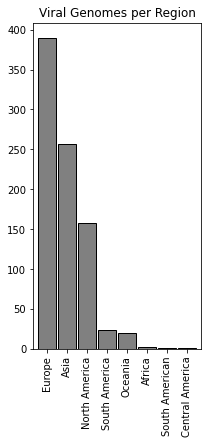

In [155]:
ax = df['region'].value_counts().plot(kind='bar',
                                    figsize=(3,6), width=0.9, ec="k", color="gray",
                                    title="Viral Genomes per Region")

### Make a global map plot

## Plot Dates

In [153]:
def plot_hist_dates(dates, date_last=0, days_back=60,
              fs = 14, fs_l=6, figsize=(5,6), color="gray",
              show=True):
    """Plot histogram of dates"""
    if not date_last:
        today = date.today()
    date_bins = [today -  timedelta(days=i) for i in range(days_back, 0, -1)]
    label = f"Sequences submitted daily\n{date_bins[0]} - {date_bins[-1]}\nTotal: {len(dates)}"

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hist(dates, ec="k", color=color, bins=date_bins)
    ax.set_xlabel("Date", fontsize=fs)
    ax.set_ylabel("Count", fontsize=fs)
    plt.xticks(rotation=45, ha='right')
    ax.text(0.02, 0.9, label, horizontalalignment='left',      
            verticalalignment='center', transform=ax.transAxes,
           fontsize=fs)
    if show:
        plt.show()

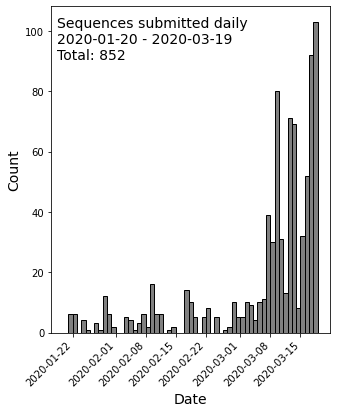

In [154]:
dates =  pd.to_datetime(df["date_submitted"])
plot_hist_dates(dates, color="gray")

# Plot cumulative Dates

In [216]:
def plot_cumulative_dates(dates, figsize = (4,6),
                         savepath="./figures/dumpster/covid19.png", fs=8):
    """Plot Cumulaative Dates"""
    date_last = 0
    if not date_last:
        today = date.today()
    date_bins = [today -  timedelta(days=i) for i in range(days_back, 0, -1)]
    date_bins = [np.datetime64(d) for d in date_bins]
    counts = dates.value_counts(bins=date_bins, sort=False)
    cum_counts = np.cumsum(counts.values)
    plt.figure(figsize=figsize)
    ax=plt.gca()
    ax.plot(date_bins[:-1], cum_counts, "ro-")
    ax.set_xlabel("Date", fontsize=fs)
    ax.set_ylabel("Sequenced SARS-Cov-2 Genomes", fontsize=fs)
    plt.xticks(rotation=45, ha='right')
    
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=200)
        print(f"Saved to {savepath}")
    plt.show()

Saved to ./figures/dumpster/covid19.png


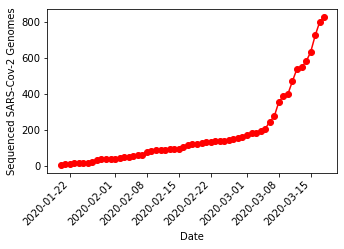

In [218]:
dates =  pd.to_datetime(df["date_submitted"])
plot_cumulative_dates(dates, figsize=(5.2,3), fs=10)